In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
mpl.style.use('ggplot')

In [2]:
file = './Data/311_Service_Requests_2013.csv'
fields = ['Created Date','Complaint Type','Descriptor','Borough']
data_df = pd.read_csv(file, skipinitialspace=True, usecols=fields)

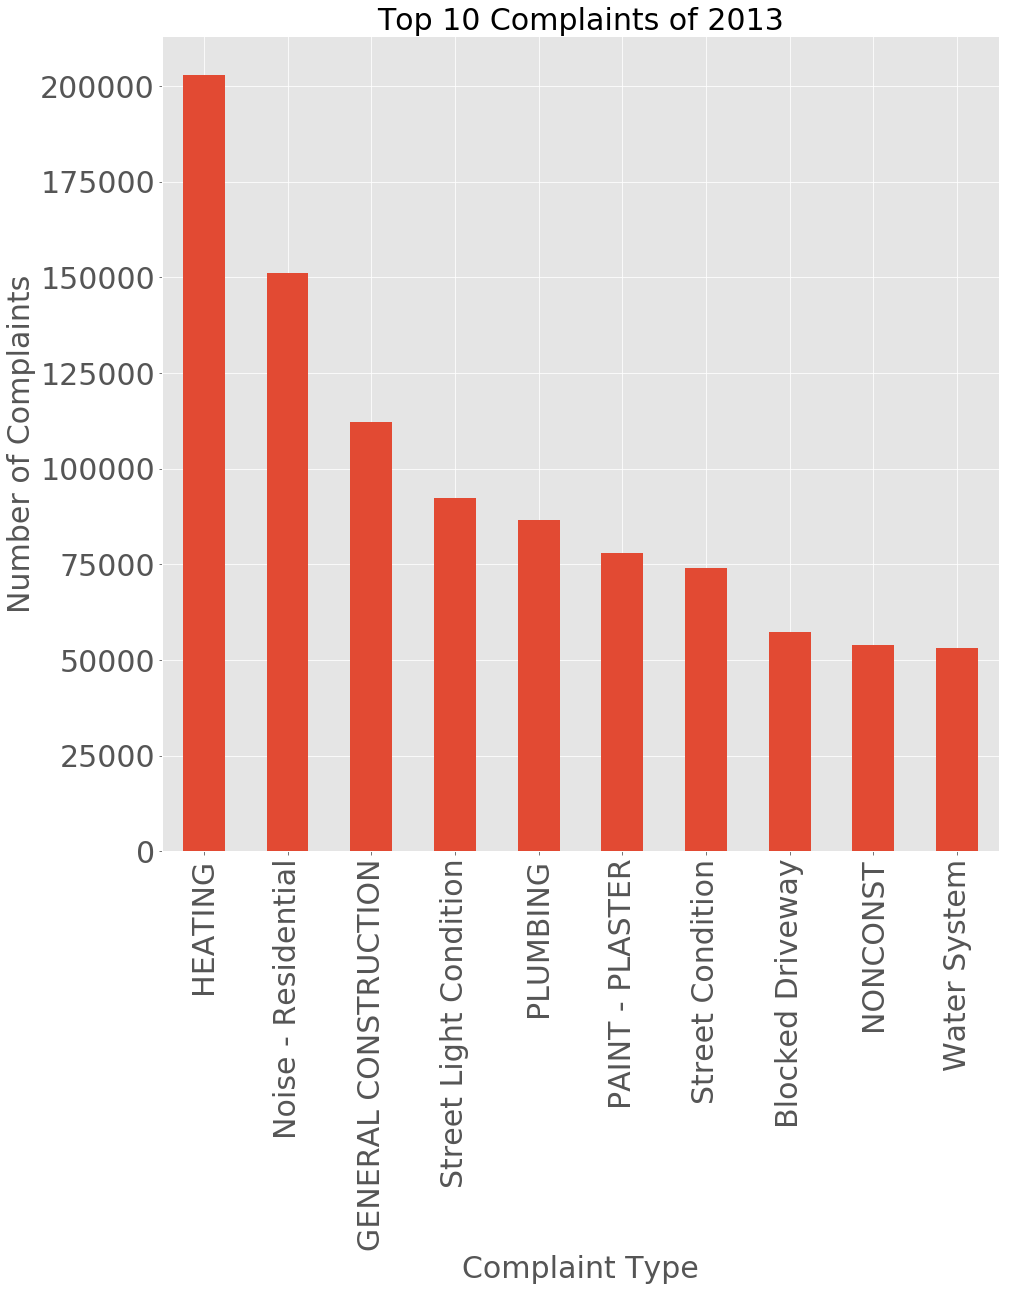

In [3]:
complaints = data_df['Complaint Type'].value_counts()
top_10_complaints_2011 = complaints[:10].plot(kind='bar', figsize=(15,15), fontsize=30)
top_10_complaints_2011.set_xlabel('Complaint Type', size=30)
top_10_complaints_2011.set_ylabel('Number of Complaints', size=30)
top_10_complaints_2011.set_title('Top 10 Complaints of 2013', size=30)

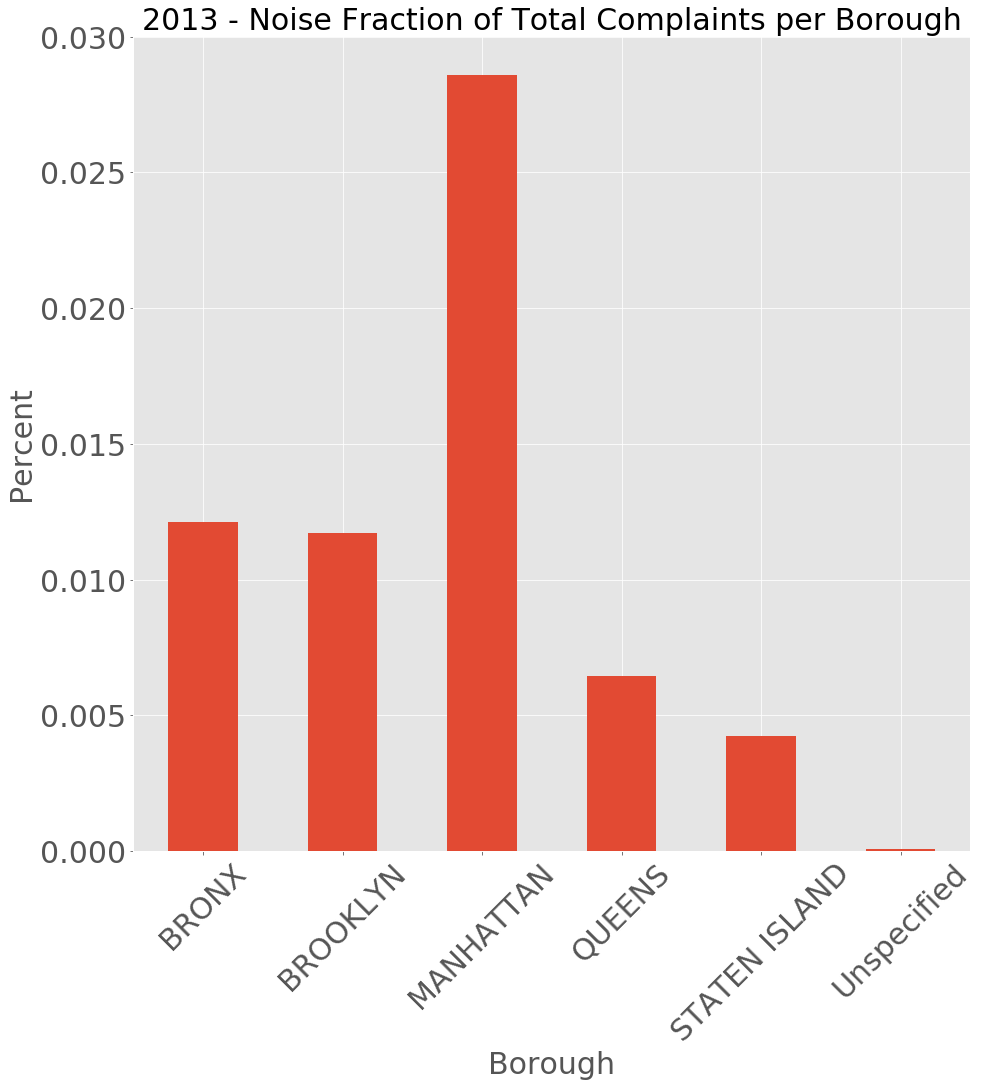

In [4]:
noise_heli = data_df['Complaint Type'] == "Noise Helicopter"
noise_park = data_df['Complaint Type'] == "Noise - Park"
noise_house_worship = data_df['Complaint Type'] == "Noise - House of Worship"
noise_commercial = data_df['Complaint Type'] == "Noise - Commercial"
noise_residential = data_df['Complaint Type'] == "Noise - Residential"
noise_vehicle = data_df['Complaint Type'] == "Noise - Vehicle"
noise_street_sidewalk = data_df['Complaint Type'] == "Noise - Street/Sidewalk"

noise_complaint_per_borough = data_df[noise_street_sidewalk]['Borough'].value_counts()
number_complaint_per_borough = data_df['Borough'].value_counts()
noise_percent_per_borough = (noise_complaint_per_borough / number_complaint_per_borough.astype(float)).plot(kind='bar', figsize=(15,15), rot=45, fontsize=30)
noise_percent_per_borough.set_xlabel('Borough', size=30)
noise_percent_per_borough.set_ylabel('Percent', size=30)
noise_percent_per_borough.set_title('2013 - Noise Fraction of Total Complaints per Borough', size=30)

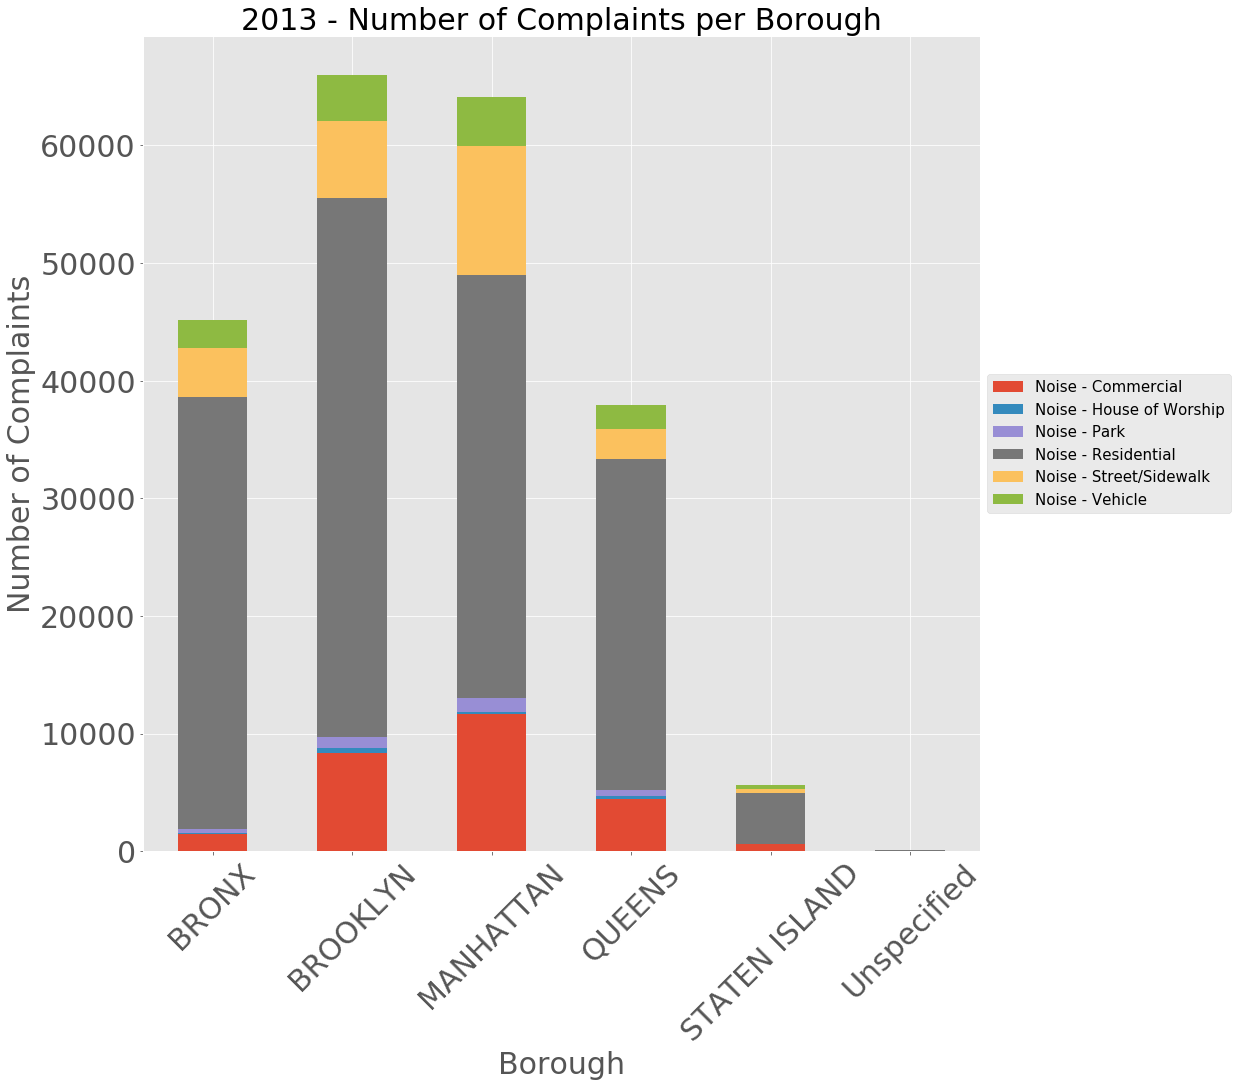

In [5]:
# 2011 - Noise per Borough
noise_per_borough = data_df[noise_heli | noise_park | noise_house_worship | noise_commercial | noise_residential | noise_vehicle | noise_street_sidewalk]
total_noise_per_borough = noise_per_borough['Borough'].value_counts()
n1 = noise_per_borough.groupby(['Borough','Complaint Type'])['Complaint Type'].count()
noise_per_borough_stacked = n1.unstack(level=1).plot(kind='bar', stacked=True, figsize=(15,15), fontsize=30, rot=45)
noise_per_borough_stacked.set_ylabel('Number of Complaints', size=30)
noise_per_borough_stacked.set_xlabel('Borough', size=30)
noise_per_borough_stacked.set_title('2013 - Number of Complaints per Borough', size=30)
noise_per_borough_stacked.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=15)

In [6]:
data_df['Created Date'] = pd.to_datetime(data_df['Created Date'])

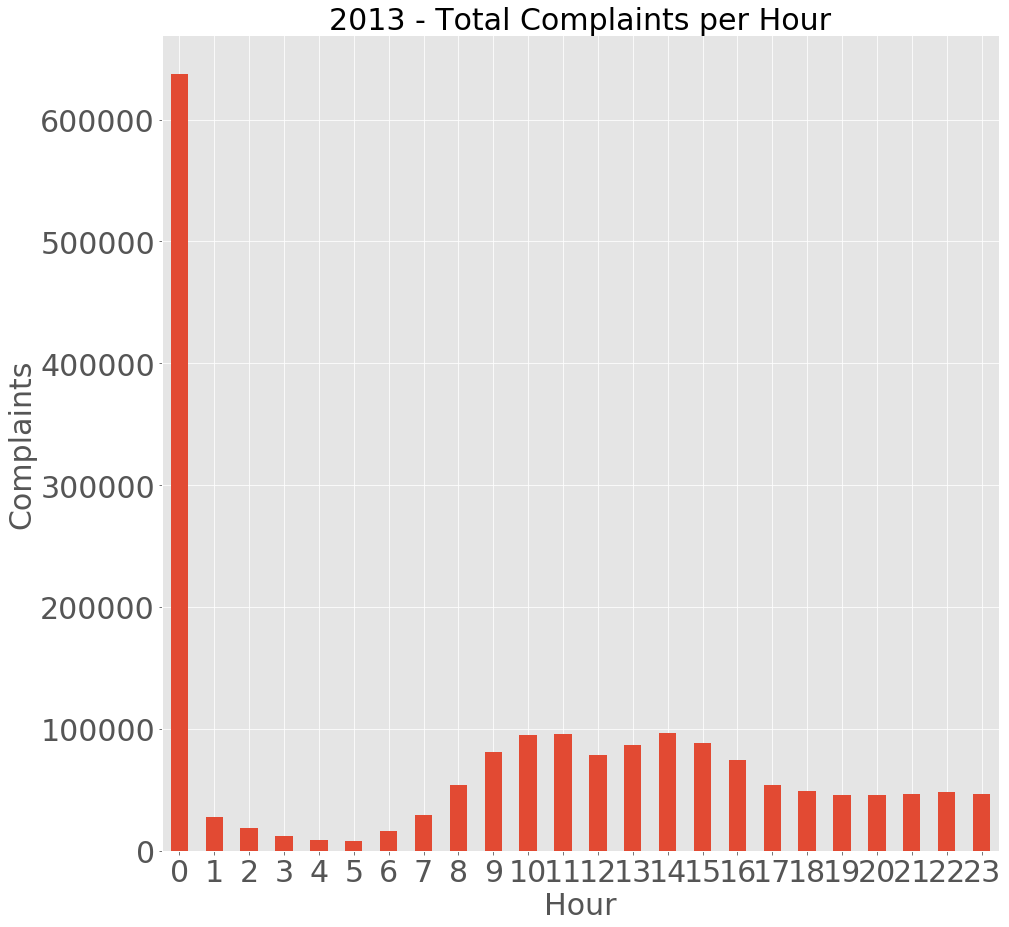

In [9]:
star = data_df.groupby(data_df['Created Date'].dt.hour)['Complaint Type'].count()
complaints_per_hour = star.plot(kind='bar', rot=0, figsize=(15,15), fontsize=30)
complaints_per_hour.set_xlabel('Hour', size=30)
complaints_per_hour.set_ylabel('Complaints', size=30)
complaints_per_hour.set_title('2013 - Total Complaints per Hour', size=30)

In [8]:
star

Created Date
0     637244
1      27638
2      18311
3      11766
4       9169
5       8418
6      16222
7      29652
8      54128
9      81202
10     94875
11     96017
12     78684
13     87192
14     96413
15     88530
16     74724
17     53588
18     49278
19     45655
20     45811
21     46219
22     48319
23     46562
Name: Complaint Type, dtype: int64